# Task 1

In [48]:
import wikipediaapi
import random
import numpy as np
import string
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation
from sklearn.preprocessing import normalize

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
folder_path = "wikipedia_content"

[nltk_data] Downloading package stopwords to C:\Users\Ardeleanu
[nltk_data]     Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
def save_wikipedia_content_to_files(topic, topic_number, num_titles=5 ):
    wiki_wiki = wikipediaapi.Wikipedia('MyProjectName (merlin@example.com)', 'en')
    search_page = wiki_wiki.page(topic)

    linked_pages = search_page.links
    linked_titles = list(linked_pages.keys())

    random_titles = random.sample(linked_titles, num_titles)

    directory = "wikipedia_content"
    os.makedirs(directory, exist_ok=True)

    result = []
    for title in random_titles:
        page = wiki_wiki.page(title)
        content = page.text
        result.append((title, content))
        
        filename = os.path.join(directory, f"{topic_number}{title}.txt")
        with open(filename, "w", encoding="utf-8") as f:
            f.write(content)

        print(f"Saved content to {filename}")

    return result

In [50]:
#save_wikipedia_content_to_files("movies", "1")
#save_wikipedia_content_to_files("drinks", "2")
#save_wikipedia_content_to_files("cars", "3")

Saved content to wikipedia_content\1Sound-on-film.txt
Saved content to wikipedia_content\1Film à clef.txt
Saved content to wikipedia_content\1Mafia comedy film.txt
Saved content to wikipedia_content\1Blockbuster (entertainment).txt
Saved content to wikipedia_content\1Arthouse science fiction film.txt
Saved content to wikipedia_content\2Liquid.txt
Saved content to wikipedia_content\2Template:Meals navbox.txt
Saved content to wikipedia_content\2Honey.txt
Saved content to wikipedia_content\2Supper.txt
Saved content to wikipedia_content\2Outback.txt
Saved content to wikipedia_content\3Economics of car usage.txt
Saved content to wikipedia_content\3D-segment.txt
Saved content to wikipedia_content\3Panel van.txt
Saved content to wikipedia_content\3Quarter panel.txt
Saved content to wikipedia_content\3Daytime running lamp.txt


[('Economics of car usage',
  'Compared to other popular modes of passenger transportation, the car has a relatively high cost per person-distance traveled.\nThe income elasticity for cars ranges from very elastic in poor countries, to inelastic in rich nations.\n The advantages of car usage include on-demand and door-to-door travel, and are not easily substituted by cheaper alternative modes of transport, with the present level and type of auto specific infrastructure in the countries with high auto usage.\nPublic costs related to the car are several including congestion and effects related to emissions.\n\nPrivate benefits\nThe benefits of using a car differ by many factors, in regard to location and culture. One general benefit is availability of use which, when coupled with public support via infrastructure (such as roads or fuel stations), can allow highly flexible movement and transportation. Because public transportations are not as well omnipresent and normally don\'t run at ce

In [51]:
def process_text_files(folder_path):
    stemmer = PorterStemmer()
    count_vectorizer = CountVectorizer()
    tfidf_vectorizer = TfidfVectorizer()
    
    documents = []

    content = ""

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, "r", encoding="utf-8") as file:
                content += file.read()

    tokens = content.split()
    processed_tokens = [stemmer.stem(word) for word in tokens if word.lower() not in stop_words]
    processed_text = " ".join(processed_tokens)

    documents.append(processed_text)

    #Bag-of-Words
    bow_matrix = count_vectorizer.fit_transform(documents)
    bow_feature_names = count_vectorizer.get_feature_names_out()

    #TF-IDF
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    
    # Bag-of-Words vector
    print("\nBag-of-Words Vector:")
    bow_vector = bow_matrix.toarray()[0]
    bowdict = {word: bow_vector[idx] for idx, word in enumerate(bow_feature_names) if bow_vector[idx] > 0}
    #print(bow_dict)
    with open("BOW.txt", "w", encoding="utf-8") as file:
        for key, value in bowdict.items():
            #print(f"key {key}, value {value}")
            file.write(f"{key}: {value}\n")
    # TF-IDF vector
    print("\nTF-IDF Vector:")
    tfidf_vector = tfidf_matrix.toarray()[0]
    tfidfdict = {word: tfidf_vector[idx] for idx, word in enumerate(tfidf_feature_names) if tfidf_vector[idx] > 0}
    #print(tfidfdict)
    with open("TF_IDF.txt", "w", encoding="utf-8") as file:
        for key, value in tfidfdict.items():
            file.write(f"{key}: {value}\n")
    return bowdict, tfidfdict

In [52]:
folder_path = 'wikipedia_content'
bow_dict, tfidf_dict = process_text_files(folder_path)


Bag-of-Words Vector:

TF-IDF Vector:


# Task 2

In [53]:
terms = list(bow_dict.keys())  # or tfidf_dict.keys()
bow_values = np.array(list(bow_dict.values())).reshape(1, -1)  # Single-row matrix for BOW
tfidf_values = np.array(list(tfidf_dict.values())).reshape(1, -1)  # Single-row matrix for TF-IDF

In [54]:
# SVD on the single-row BOW vector
svd_bow = TruncatedSVD(n_components=3)
bow_lsa = svd_bow.fit_transform(bow_values)

# SVD on the single-row TF-IDF vector
svd_tfidf = TruncatedSVD(n_components=3)
tfidf_lsa = svd_tfidf.fit_transform(tfidf_values)

C:\Users\Ardeleanu Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\decomposition\_truncated_svd.py:273: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
C:\Users\Ardeleanu Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\decomposition\_truncated_svd.py:273: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


In [55]:
print("LSA result on BOW (single vector, 3 concepts):")
print(bow_lsa)

print("\nLSA result on TF-IDF (single vector, 3 concepts):")
print(tfidf_lsa)


LSA result on BOW (single vector, 3 concepts):
[[633.24560796]]

LSA result on TF-IDF (single vector, 3 concepts):
[[1.]]


# Attempt 2

In [56]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    words = text.split()
    
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    return ' '.join(words)

In [57]:
folder_path = 'wikipedia_content'
documents = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        documents.append(preprocess_text(text))

num_topics = 3

In [58]:
# BOW Vectorization
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(documents)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [59]:
lsa_bow = TruncatedSVD(num_topics).fit_transform(bow_matrix)
lsa_tfidf = TruncatedSVD(num_topics).fit_transform(tfidf_matrix)

print("LSA result on BOW (3 topics):")
print(lsa_bow)

#normalized version
lsa_bow_normalized = normalize(lsa_bow, norm='l2', axis=1)
print()
print("Normalized LSA result on BOW (unit norm):")
print(lsa_bow_normalized)

print("\nLSA result on TF-IDF (3 topics):")
print(lsa_tfidf)

LSA result on BOW (3 topics):
[[  0.66716651   1.12304794   1.8525381 ]
 [  4.01366761   3.59966393   9.79315052]
 [  1.92460518   1.53412733   8.02491588]
 [  0.65303778   0.5665817    1.182529  ]
 [  4.31148727   4.58359464  10.64824747]
 [426.76846423 -26.63538749  -3.38514651]
 [ 49.19397659 224.72804216  -8.76494592]
 [  9.19654571   7.87879797  23.90575555]
 [  3.74513761   2.92204425   5.16820743]
 [  0.           0.           0.        ]
 [  1.4257834    1.21933416  13.60857707]
 [ 10.49913682  10.66402675  88.71170389]
 [  5.56920097   5.35682601  24.2380319 ]
 [  6.48785193   7.00640798  68.45912092]
 [  0.99787569   1.20557151   4.0513799 ]]

Normalized LSA result on BOW (unit norm):
[[ 0.29432478  0.49543979  0.81725904]
 [ 0.35903226  0.32199863  0.87602096]
 [ 0.2292872   0.18276775  0.95604567]
 [ 0.44579873  0.38677916  0.80725794]
 [ 0.34858196  0.37058172  0.86090639]
 [ 0.99802678 -0.06228865 -0.00791639]
 [ 0.21368586  0.97616025 -0.03807265]
 [ 0.34317928  0.294006

# Task 3

In [60]:
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

#topic-term matrix (num_topics, num_terms)
topic_term_matrix = nmf_model.components_

#document-topic matrix (num_documents, num_topics)
doc_topic_matrix = nmf_model.transform(tfidf_matrix)

print("Document-Topic Matrix (W):")
print(doc_topic_matrix)
print("\n")

print("Topic-Term Matrix (H):")
print(topic_term_matrix)
print("\n")


Document-Topic Matrix (W):
[[0.26729077 0.         0.        ]
 [0.47657929 0.         0.03081171]
 [0.44505435 0.0049696  0.        ]
 [0.3260265  0.         0.        ]
 [0.38983434 0.         0.02036305]
 [0.00229566 0.         0.34597948]
 [0.00921843 0.         0.36770383]
 [0.01729946 0.         0.39419967]
 [0.03020918 0.         0.19561871]
 [0.         0.         0.        ]
 [0.0149833  0.00827331 0.51076238]
 [0.00114583 0.01181321 0.53670513]
 [0.         0.         0.73738319]
 [0.0136022  0.8537042  0.07917557]
 [0.         0.88666875 0.        ]]


Topic-Term Matrix (H):
[[0.         0.         0.         ... 0.         0.01314332 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00262464 0.00131232 0.00061096 ... 0.03250769 0.         0.00061096]]




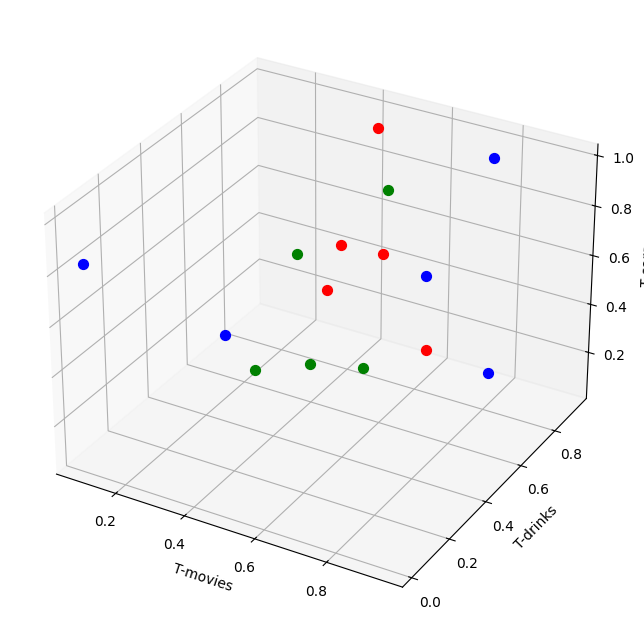

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)  
doc_topic_matrix = np.random.rand(15, 3)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each group of 5 lines
colors = ['red'] * 5 + ['blue'] * 5 + ['green'] * 5


for i in range(doc_topic_matrix.shape[0]):
    ax.scatter(doc_topic_matrix[i, 0], doc_topic_matrix[i, 1], doc_topic_matrix[i, 2], color=colors[i], s=50)

# Set labels for axes
ax.set_xlabel('T-movies')
ax.set_ylabel('T-drinks')
ax.set_zlabel('T-cars')

plt.show()


In [61]:
#feature names
terms = tfidf_vectorizer.get_feature_names_out()

top_topics = 5

for topic_idx, topic in enumerate(topic_term_matrix):
    top_terms_idx = topic.argsort()[-top_topics:][::-1] #topics - top n = top_topics words, descending order
    top_terms = [terms[i] for i in top_terms_idx]
    print(f"Topic #{topic_idx}:")
    print("Top terms:", " ".join(top_terms))


Topic #0:
Top terms: film blockbust base sound mafia


Topic #1:
Top terms: panel quarter van door vehicl
Topic #2:
Top terms: car cost drl honey liquid


In [62]:
for doc_idx, doc in enumerate(doc_topic_matrix):
    #highest value topic
    top_topic_idx = doc.argmax()
    print(f"Document #{doc_idx + 1} is most strongly associated with Topic #{top_topic_idx + 1} - weight of {doc[top_topic_idx]:.4f}")


Document #1 is most strongly associated with Topic #1 - weight of 0.2673
Document #2 is most strongly associated with Topic #1 - weight of 0.4766
Document #3 is most strongly associated with Topic #1 - weight of 0.4451
Document #4 is most strongly associated with Topic #1 - weight of 0.3260
Document #5 is most strongly associated with Topic #1 - weight of 0.3898
Document #6 is most strongly associated with Topic #3 - weight of 0.3460
Document #7 is most strongly associated with Topic #3 - weight of 0.3677
Document #8 is most strongly associated with Topic #3 - weight of 0.3942
Document #9 is most strongly associated with Topic #3 - weight of 0.1956
Document #10 is most strongly associated with Topic #1 - weight of 0.0000
Document #11 is most strongly associated with Topic #3 - weight of 0.5108
Document #12 is most strongly associated with Topic #3 - weight of 0.5367
Document #13 is most strongly associated with Topic #3 - weight of 0.7374
Document #14 is most strongly associated with T

# Task 4

In [63]:
lda = LatentDirichletAllocation(num_topics, random_state=42)
lda.fit(bow_matrix)

#feature names
terms = bow_vectorizer.get_feature_names_out()

top_topics = 5

for topic_idx, topic in enumerate(lda.components_):
    top_terms_idx = topic.argsort()[-top_topics:][::-1]
    top_terms = [terms[i] for i in top_terms_idx]
    
    print(f"Topic #{topic_idx + 1}:")
    print("Top terms:", " ".join(top_terms))
    print("\n")


Topic #1:
Top terms: honey bee use van panel


Topic #2:
Top terms: drl car cost vehicl requir


Topic #3:
Top terms: liquid use film outback displaystyl


